In [33]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

(300, 225, 3)
(800, 1500, 3)


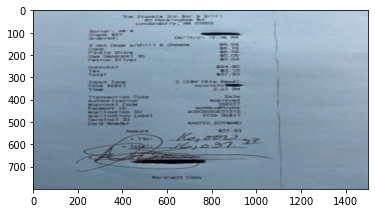

In [53]:
im="D:/newbill.jpg"
img=cv2.imread(im)
print(img.shape)
img=cv2.resize(img,(1500,800))
print(img.shape)
plt.imshow(img)
plt.show()


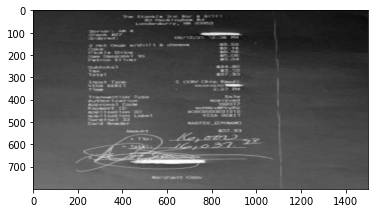

In [54]:
org=img.copy()
gray=cv2.cvtColor(org,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="binary")
plt.show()


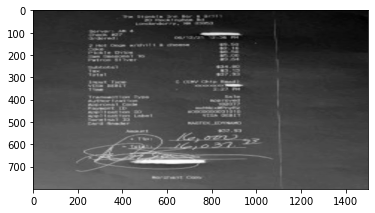

In [55]:
blur=cv2.GaussianBlur(gray,(5,5),0)
plt.imshow(blur, cmap="binary")
plt.show()


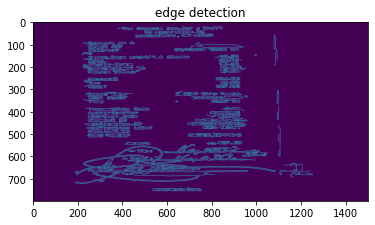

In [56]:
edge=cv2.Canny(blur,0,50)
orig_edge=edge.copy()
plt.imshow(orig_edge)
plt.title("edge detection")
plt.show()

In [57]:
contours, _=cv2.findContours(edge,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)

In [58]:
contours=sorted(contours,reverse= True, key=cv2.contourArea)

In [59]:
for c in contours:
    p=cv2.arcLength(c, True)
    approx=cv2.approxPolyDP(c,0.01*p,True)
    if len(approx)==4 :
        target=approx
        break
print(target.shape)

(4, 1, 2)


In [60]:
def reorder(h):
    h=h.reshape((4,2))
    print(h)
    hnew=np.zeros((4,2),dtype=np.float32)
    add=h.sum(axis=1)
    hnew[3]=h[np.argmax(add)]
    hnew[1]=h[np.argmax(add)]
    diff=np.diff(h,axis=1)
    hnew[0]=h[np.argmax(diff)]
    hnew[2]=h[np.argmax(diff)]
    return hnew



In [61]:
reorderd=reorder(target)

[[ 936  599]
 [1041  595]
 [ 941  600]
 [ 964  586]]


In [62]:
input=reorderd
output=np.float32([[0,0],[800,0],[800,800],[0,800]])

In [63]:
m=cv2.getPerspectiveTransform(input,output)
ans=cv2.warpPerspective(org,m, (800,800))

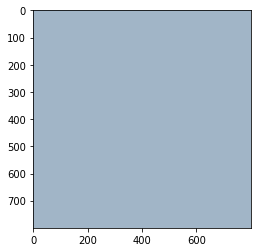

In [64]:
plt.imshow(ans)
plt.show()

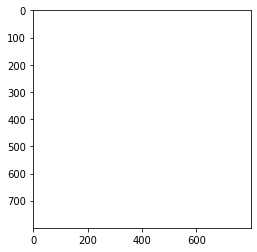

In [65]:
res=cv2.cvtColor(ans,cv2.COLOR_BGR2GRAY)
b_res=cv2.GaussianBlur(res,(3,3),0)
plt.imshow(b_res,cmap="binary")
plt.show()